# IMPORTS

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

# DATA LOADING

In [ ]:
df = pd.read_csv('EEW_features_2024-10-21.csv')

df.columns

Index([' filename ', ' date ', ' time ', ' Rmag ', ' Rdpth ', ' Rlat ',
       ' Rlon ', ' Station ', ' Sheight ', ' Slat ', ' Slon ', ' RSdistance ',
       ' azimuth ', ' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' ddt_PDt ', ' ddt_PVt ', 'ddt_PAt ', ' PGA ',
       ' PGV ', ' tPGA ', ' tPGV '],
      dtype='object')

In [ ]:
df.head()

,filename,date,time,Rmag,Rdpth,Rlat,Rlon,Station,Sheight,Slat,...,ddt_PDd,ddt_PVd,ddt_PAd,ddt_PDt,ddt_PVt,ddt_PAt,PGA,PGV,tPGA,tPGV
0,1,2,3,4.0,5,6.000,7.000,8,9.0,10.0000,...,25.00000,26.00000,27.00000,28,29,30,31.000,32.000,33.00,34.00
1,'HKD0540001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD054,63.0,43.7996,...,0.00637,0.08890,0.69803,0.04389,0.21261,1.91145,26.949,7.176,32.19,31.36
2,'HKD0550001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD055,23.0,43.8244,...,0.00554,0.05553,1.18973,0.05951,0.39105,6.53578,60.838,8.211,30.04,30.43
3,'HKD0590001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD059,30.0,43.8569,...,0.02187,0.09294,1.50502,0.07332,0.26394,7.50573,108.173,17.529,28.40,31.00
4,'HKD0600001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD060,6.0,43.9136,...,0.00051,0.09748,3.17435,0.07002,0.44141,15.92743,155.062,14.556,27.09,30.06


In [ ]:
data = df[[' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' PGA ']]

data = data.replace([np.inf, -np.inf], np.nan)
data.columns = data.columns.str.strip()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25437 entries, 0 to 25436
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pkev12   25437 non-null  float64
 1   pkev23   25437 non-null  float64
 2   durP     25437 non-null  float64
 3   tauPd    25437 non-null  float64
 4   tauPt    25437 non-null  float64
 5   PDd      25437 non-null  float64
 6   PVd      25437 non-null  float64
 7   PAd      25437 non-null  float64
 8   PDt      25437 non-null  float64
 9   PVt      25437 non-null  float64
 10  PAt      25437 non-null  float64
 11  ddt_PDd  25437 non-null  float64
 12  ddt_PVd  25437 non-null  float64
 13  ddt_PAd  25437 non-null  float64
 14  PGA      25437 non-null  float64
dtypes: float64(15)
memory usage: 2.9 MB


In [ ]:
data['PGA'].describe()

,PGA
count,25437.000000
mean,118.728420
std,264.499408
min,0.477000
25%,9.655000
50%,32.791000
75%,107.627000
max,6253.012000


# SCALING PGA

In [ ]:
data.loc[:, 'PGA'] = data['PGA'] / 980.665

data['PGA'].describe()

,PGA
count,25437.000000
mean,0.121069
std,0.269714
min,0.000486
25%,0.009845
50%,0.033438
75%,0.109749
max,6.376298


# LINEAR CORRELATION

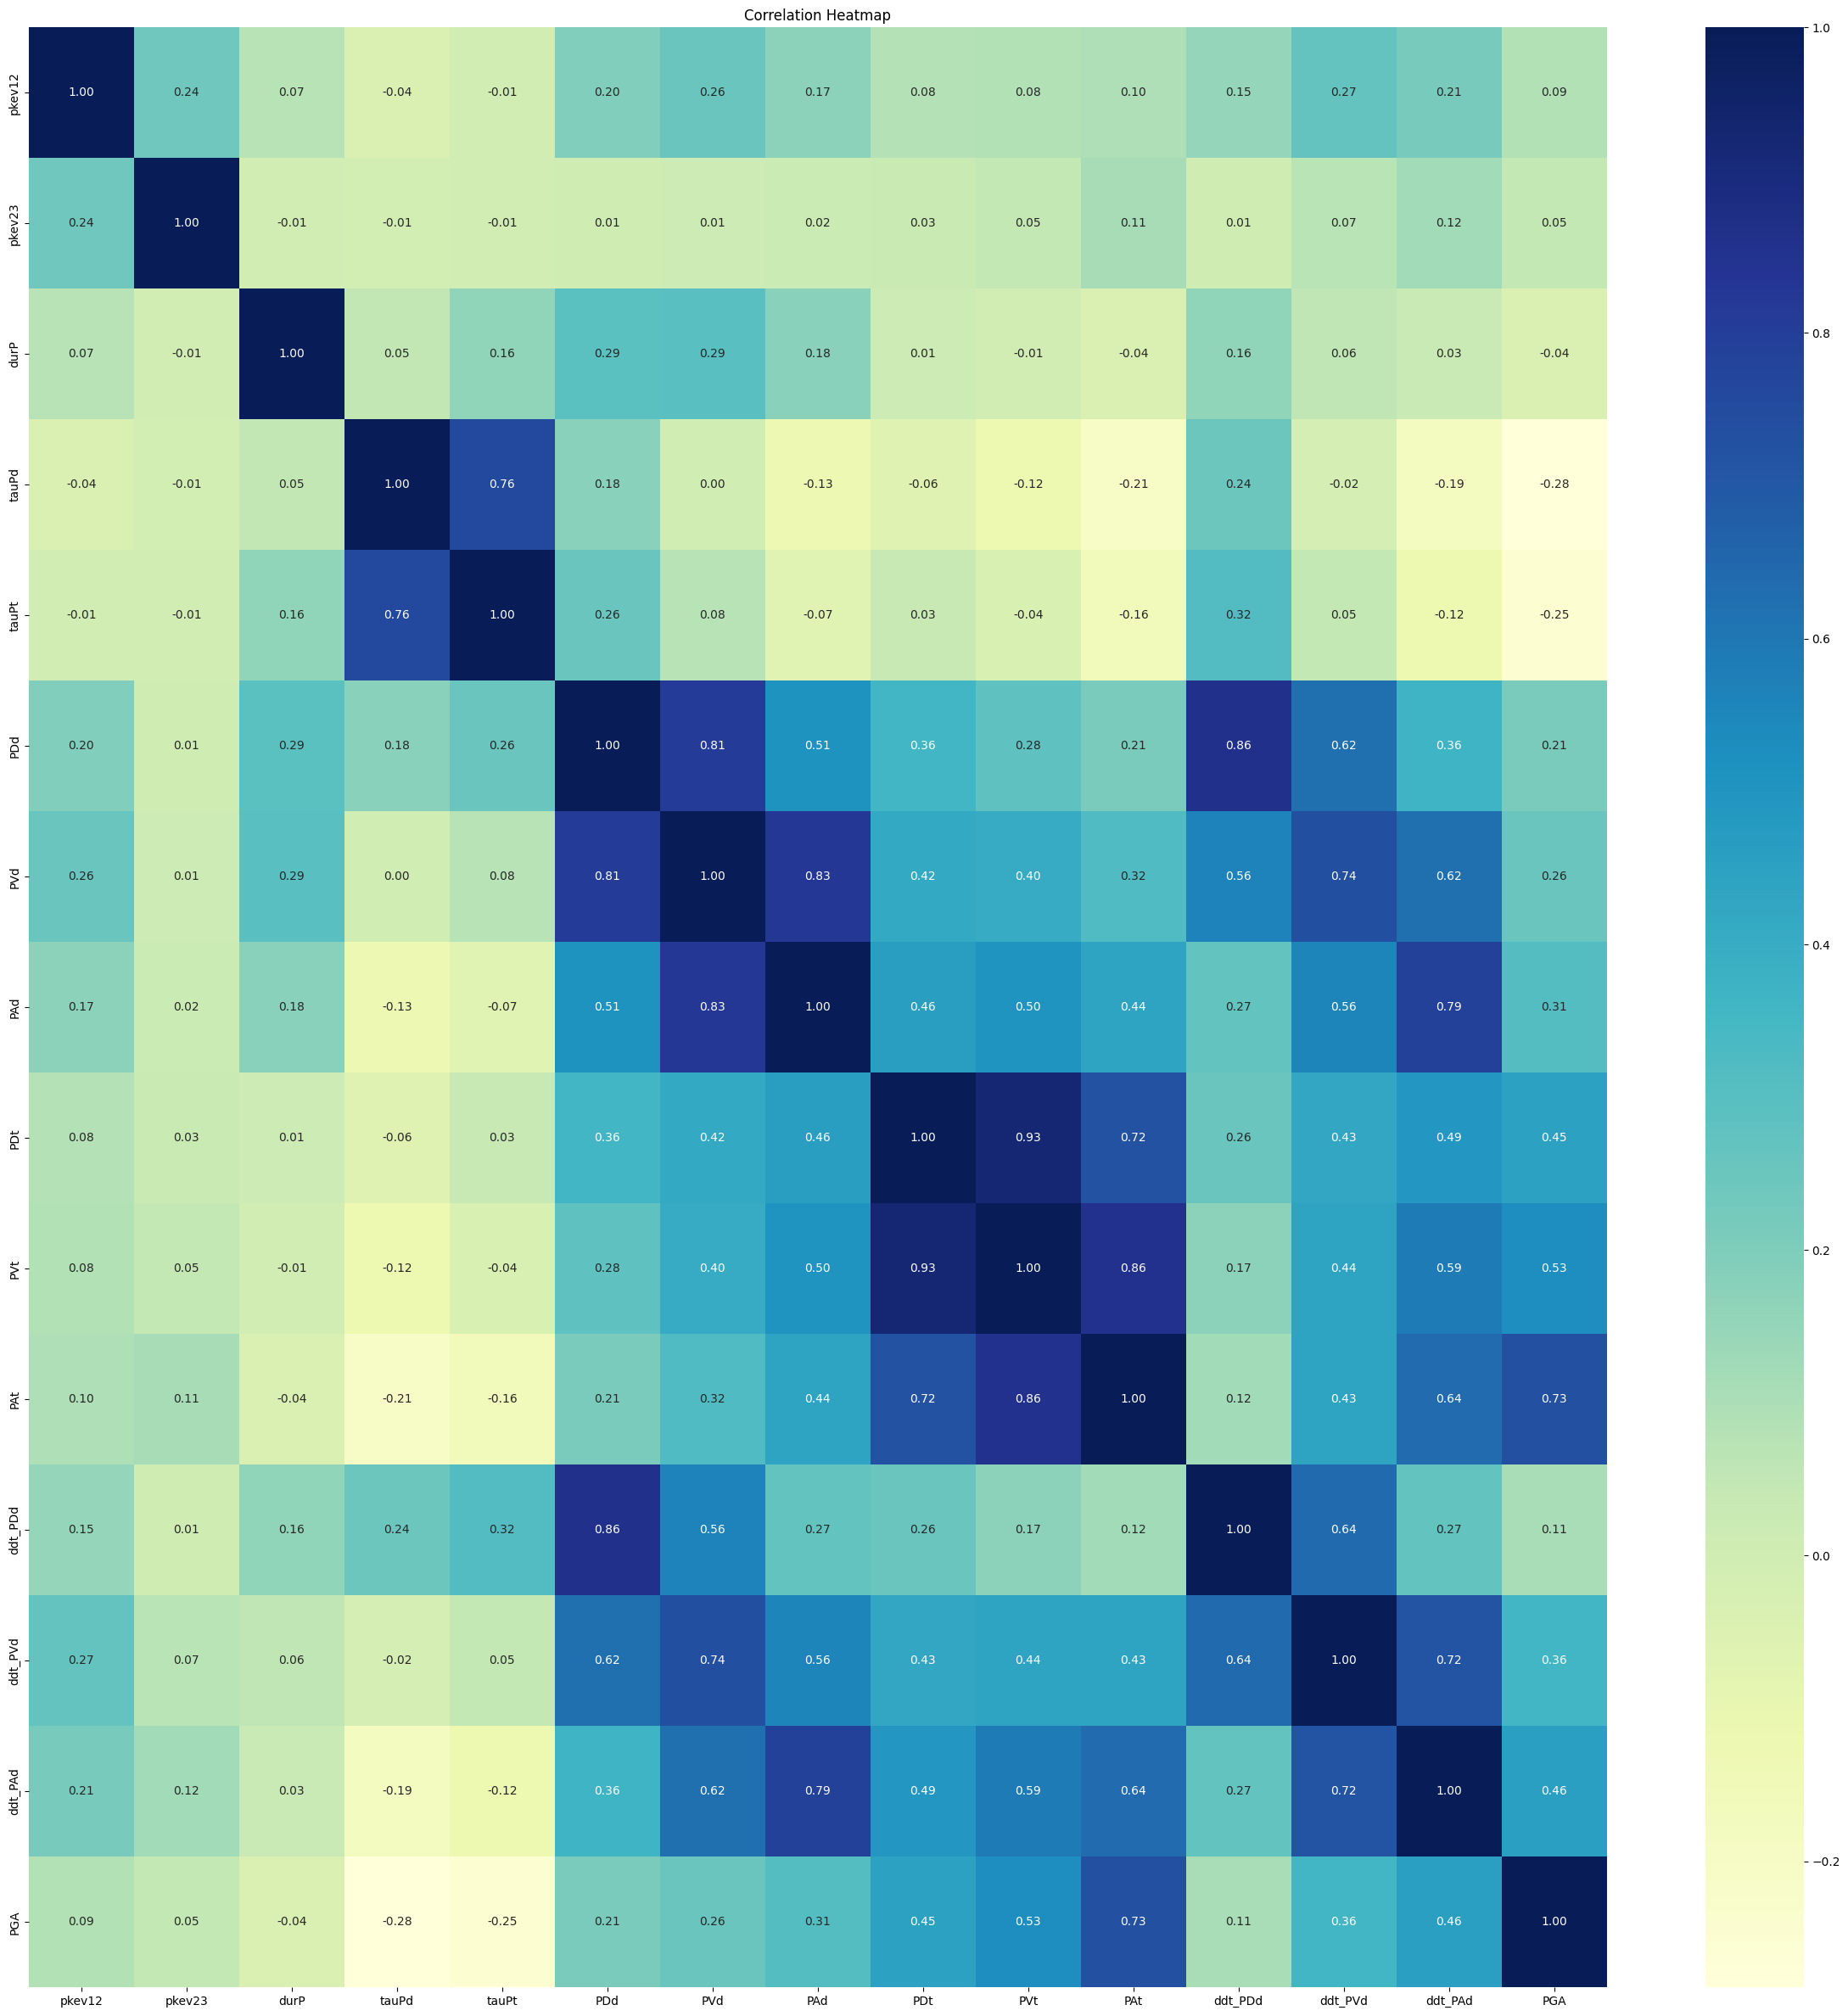

In [ ]:
plt.figure(figsize=(30,30))

sns.heatmap(data.corr(), fmt=".2f", cmap='YlGnBu', annot=True)

plt.title("Correlation Heatmap")

plt.show()

In [ ]:
data.corr()['PGA'].sort_values(ascending=False)

,PGA
PGA,1.000000
PAt,0.729996
PVt,0.527991
ddt_PAd,0.456526
PDt,0.449657
ddt_PVd,0.358191
PAd,0.311182
PVd,0.258245
PDd,0.210669
ddt_PDd,0.106611


# SAMPLED SCATTER PLOT AND FEATURE HISTOGRAM

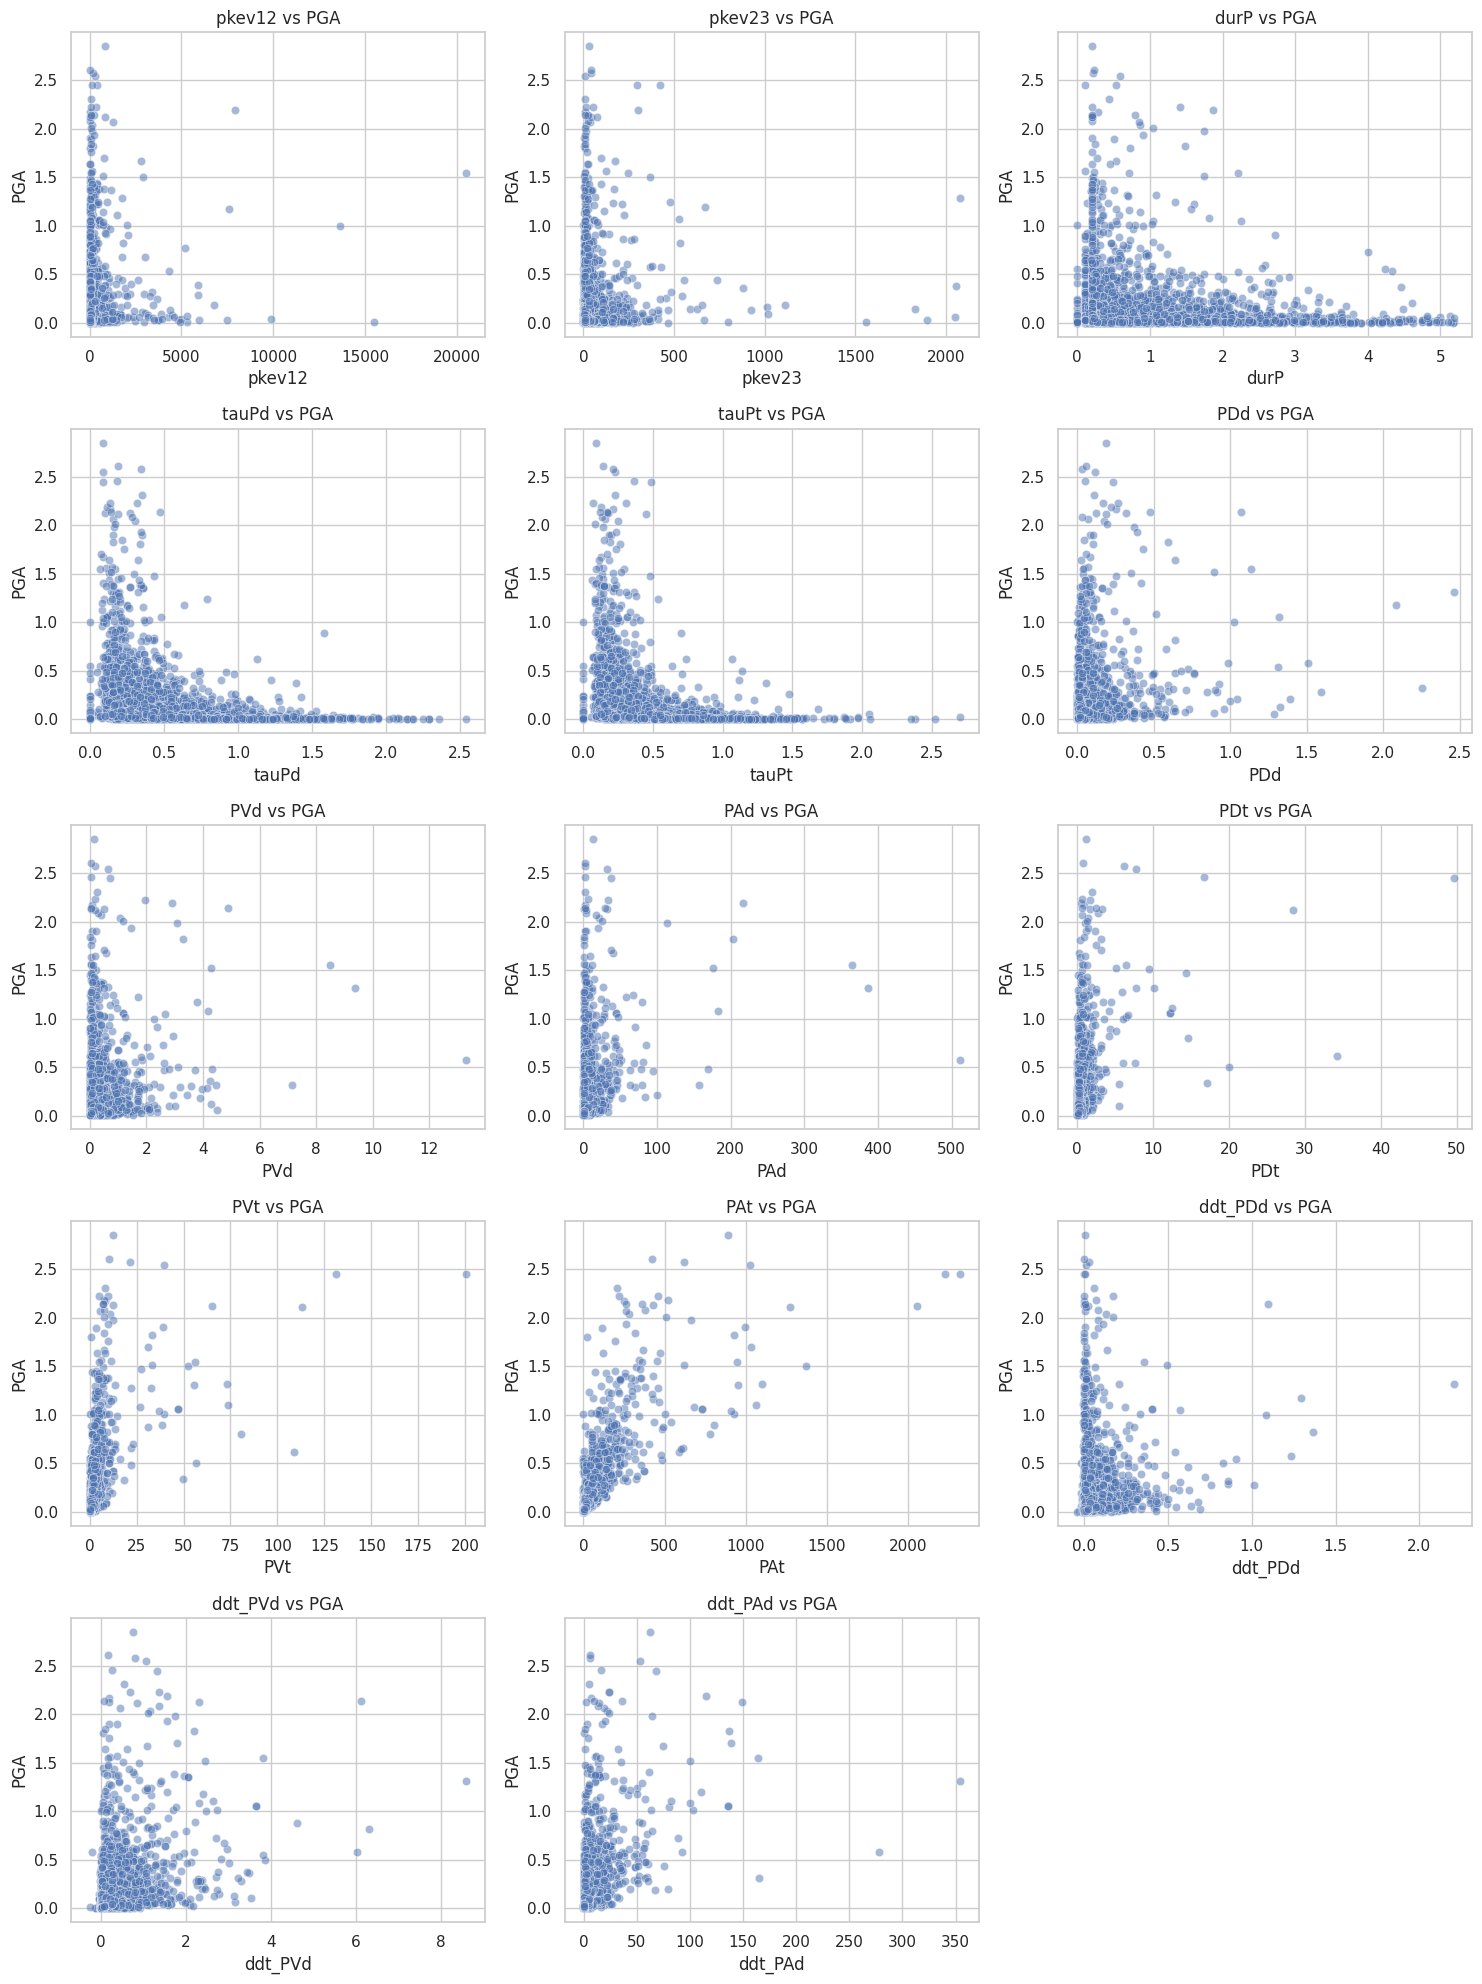

In [ ]:
#SAMPLING DONE BECAUSE OF COMPUTATIONAL LIMITATIONS


max_points = 5000
plot_data = data.sample(n=max_points, random_state=42) if len(data) > max_points else data.copy()

features = plot_data.columns.tolist()
features.remove('PGA')  # target
target = 'PGA'

sns.set(style="whitegrid")

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=plot_data[feature], y=plot_data[target],
                    ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('PGA')
    axes[i].set_title(f'{feature} vs PGA')


for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


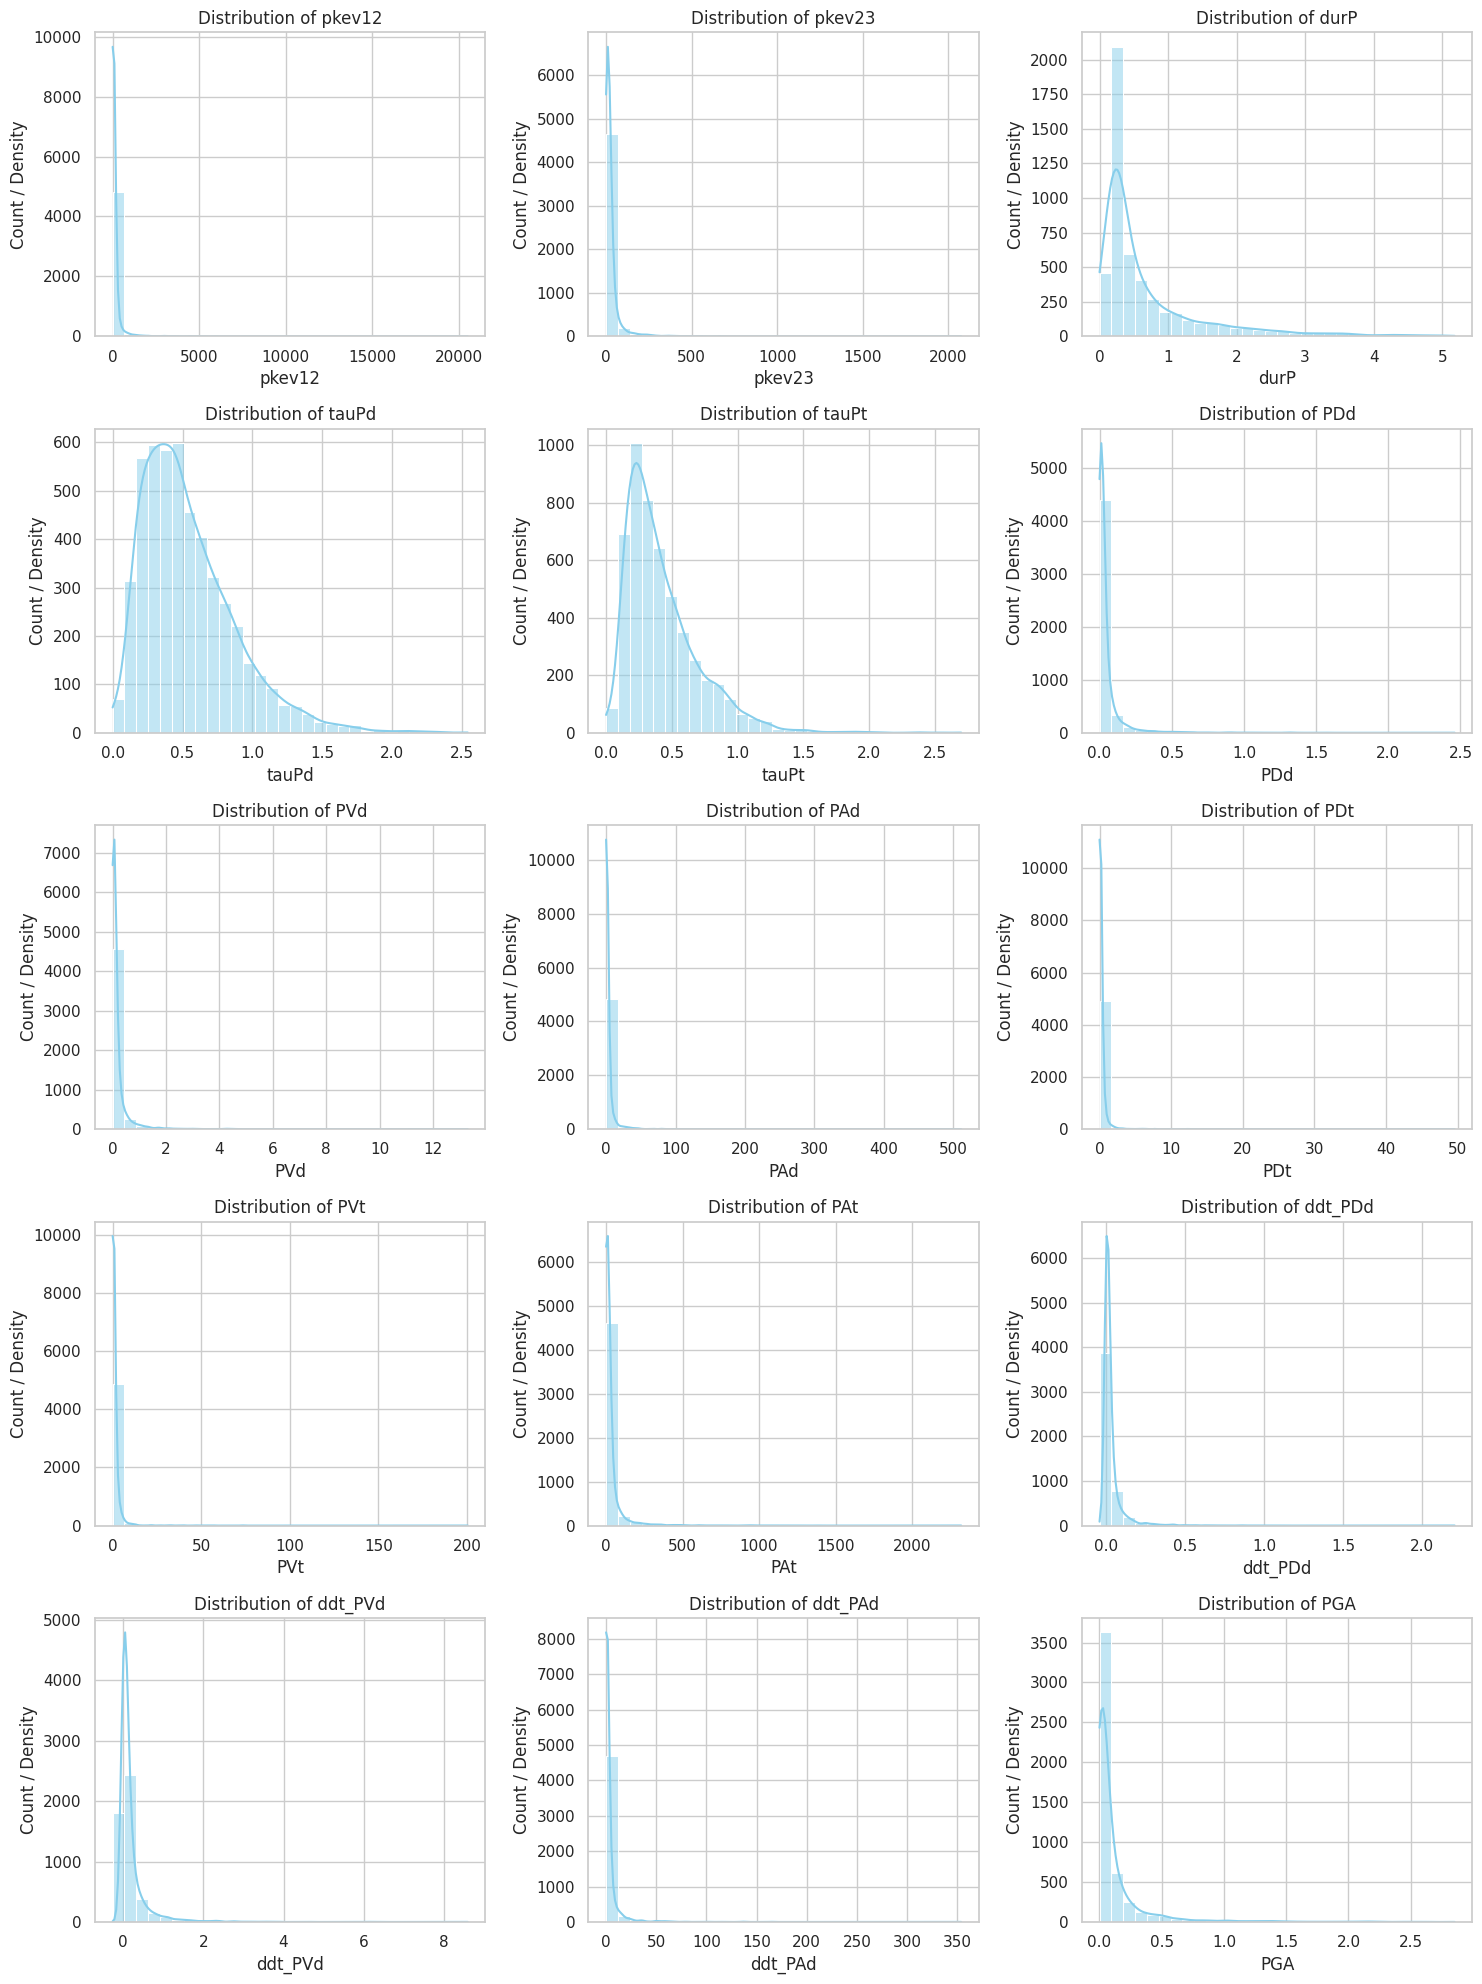

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plot_data = plot_data.replace([np.inf, -np.inf], np.nan)

max_points = 5000
plot_data = plot_data.sample(n=max_points, random_state=42) if len(plot_data) > max_points else plot_data.copy()

features = plot_data.columns.tolist()
n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(plot_data[feature].dropna(), bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count / Density')

for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


NORMALITY CHECK




Skewness and Kurtosis:
pkev12: Skew = 42.01, Kurtosis = 3036.15
pkev23: Skew = 158.42, Kurtosis = 25207.58
durP: Skew = 2.56, Kurtosis = 10.27
tauPd: Skew = 5.19, Kurtosis = 194.76
tauPt: Skew = 8.99, Kurtosis = 446.69
PDd: Skew = 49.32, Kurtosis = 4537.26
PVd: Skew = 21.71, Kurtosis = 1071.09
PAd: Skew = 38.06, Kurtosis = 2553.26
PDt: Skew = 23.53, Kurtosis = 759.71
PVt: Skew = 22.11, Kurtosis = 667.20
PAt: Skew = 15.13, Kurtosis = 357.39
ddt_PDd: Skew = 103.66, Kurtosis = 14078.65
ddt_PVd: Skew = 14.17, Kurtosis = 413.91
ddt_PAd: Skew = 19.36, Kurtosis = 580.31
PGA: Skew = 6.10, Kurtosis = 60.26

Rows with outliers: 2342 / 25437


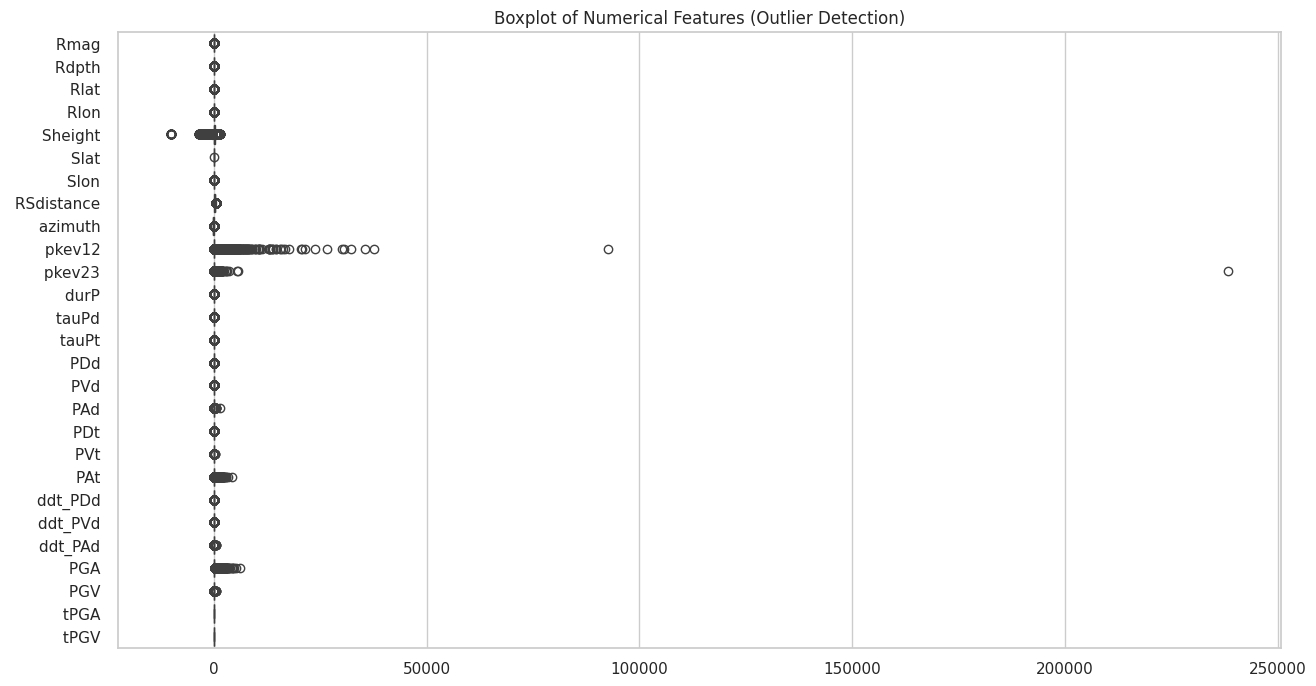

In [ ]:
# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis:")
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"{col}: Skew = {data[col].skew():.2f}, Kurtosis = {data[col].kurt():.2f}")

# Detect outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outlier_mask = (z_scores > 3)
print(f"\nRows with outliers: {np.sum(outlier_mask.any(axis=1))} / {data.shape[0]}")

# Visualize outliers with boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

In [ ]:
# Shapiro-Wilk test for normality (sampled for speed)
print("\nNormality check (Shapiro-Wilk test):")
for col in data.select_dtypes(include=[np.number]).columns:
    stat, p = stats.shapiro(data[col].sample(min(5000, len(data))))  # limit sample size
    print(f"{col}: p-value = {p:.4f} --> {'Normal' if p > 0.05 else 'Not Normal'}")


Normality check (Shapiro-Wilk test):
pkev12: p-value = 0.0000 --> Not Normal
pkev23: p-value = 0.0000 --> Not Normal
durP: p-value = 0.0000 --> Not Normal
tauPd: p-value = 0.0000 --> Not Normal
tauPt: p-value = 0.0000 --> Not Normal
PDd: p-value = 0.0000 --> Not Normal
PVd: p-value = 0.0000 --> Not Normal
PAd: p-value = 0.0000 --> Not Normal
PDt: p-value = 0.0000 --> Not Normal
PVt: p-value = 0.0000 --> Not Normal
PAt: p-value = 0.0000 --> Not Normal
ddt_PDd: p-value = 0.0000 --> Not Normal
ddt_PVd: p-value = 0.0000 --> Not Normal
ddt_PAd: p-value = 0.0000 --> Not Normal
PGA: p-value = 0.0000 --> Not Normal


MULTICOLINEARITY CHECK

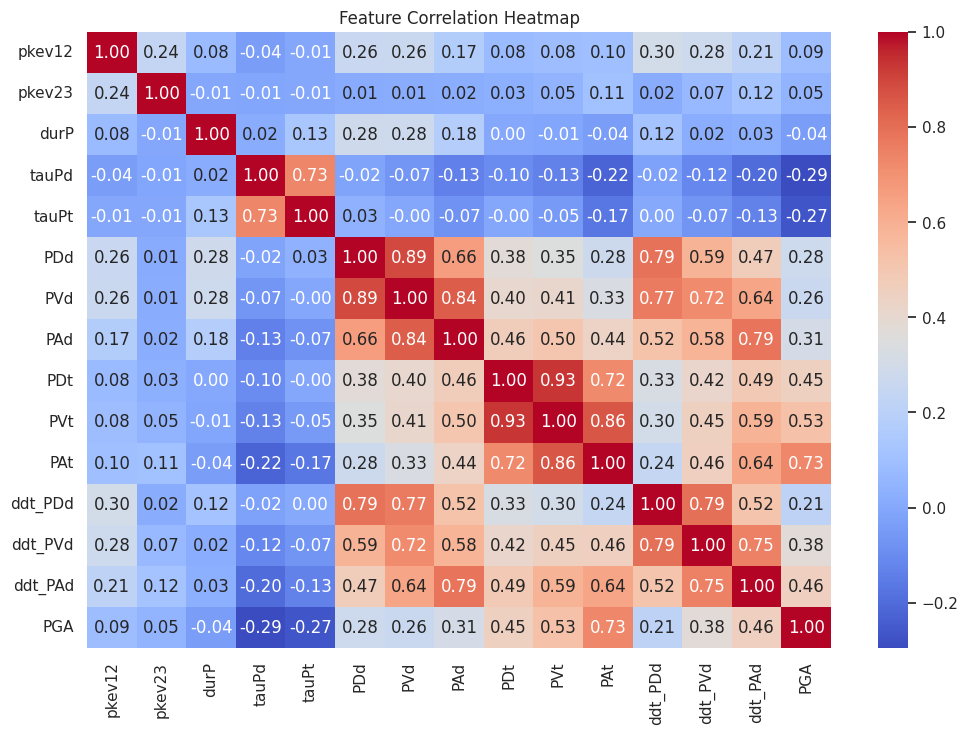


Variance Inflation Factor (VIF):
     Feature        VIF
0    pkev12   1.218953
1    pkev23   1.105949
2      durP   1.859761
3     tauPd   6.811198
4     tauPt   7.260916
5       PDd  10.128572
6       PVd  22.217681
7       PAd  11.034983
8       PDt  10.402499
9       PVt  20.072139
10      PAt   9.977096
11  ddt_PDd   6.439673
12  ddt_PVd   8.912626
13  ddt_PAd   8.039798
14      PGA   3.020819


In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
# Remove the first row before calculating correlation and VIF
data_numeric = data.iloc[1:].select_dtypes(include=[np.number])
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_numeric.dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
# Choose a target variable (e.g., tPGA or tPGV)
target_col = 'PGA'  # change as per your dataset

# Strip whitespace from column names
data.columns = data.columns.str.strip()

X = data.drop(columns=[target_col])
y = data[target_col]

X_const = sm.add_constant(X.select_dtypes(include=[np.number]))
model = sm.OLS(y, X_const).fit()

# Breusch–Pagan Test (heteroscedasticity)
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
print("\nBreusch–Pagan Test Results:")
print(dict(zip(labels, bp_test)))

# Durbin–Watson Test (autocorrelation)
dw_stat = sm.stats.durbin_watson(model.resid)
print(f"\nDurbin–Watson statistic: {dw_stat:.3f}")


Breusch–Pagan Test Results:
{'LM Stat': np.float64(6307.237751771383), 'LM p-value': np.float64(0.0), 'F Stat': np.float64(598.7028262367883), 'F p-value': np.float64(0.0)}

Durbin–Watson statistic: 1.294


In [ ]:
!pip install --quiet optuna scikit-learn matplotlib pandas numpy

import os, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.8 MB/s eta 0:00:00


In [ ]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(4)

In [ ]:
df = pd.read_csv("EEW_features_2024-10-21.csv")
df.columns = df.columns.str.strip()
for col in df.columns:
    if col not in ['filename', 'date', 'time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(df.median(numeric_only=True))

p_wave_features = ['pkev12', 'pkev23', 'durP', 'tauPd', 'tauPt',
                   'PDd', 'PVd', 'PAd', 'PDt', 'PVt', 'PAt',
                   'ddt_PDd', 'ddt_PVd', 'ddt_PAd', 'ddt_PDt', 'ddt_PVt', 'ddt_PAt']

df = df[(df[p_wave_features] > 0).all(axis=1)]

X = df[p_wave_features]
y_raw = df['PGA']
X = np.log1p(X)
y_log = np.log1p(y_raw)

In [ ]:
y_bins = pd.qcut(y_log, q=10, labels=False, duplicates='drop')
sss1 = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_idx, temp_idx = next(sss1.split(X, y_bins))
sss2 = StratifiedShuffleSplit(n_splits=1, train_size=0.5, random_state=42)
val_idx, test_idx = next(sss2.split(X.iloc[temp_idx], y_bins.iloc[temp_idx]))
val_idx, test_idx = temp_idx[val_idx], temp_idx[test_idx]

X_train, X_val, X_test = X.iloc[train_idx], X.iloc[val_idx], X.iloc[test_idx]
y_train_log, y_val_log, y_test_log = y_log.iloc[train_idx], y_log.iloc[val_idx], y_log.iloc[test_idx]
y_train_raw, y_val_raw, y_test_raw = y_raw.iloc[train_idx], y_raw.iloc[val_idx], y_raw.iloc[test_idx]

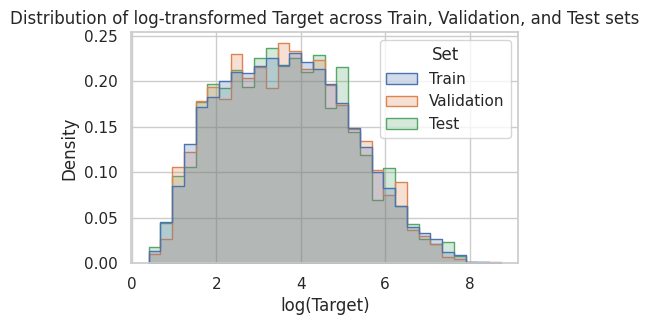

In [ ]:
plot_df = pd.DataFrame({
    'Target (Log)': pd.concat([y_train_log, y_val_log, y_test_log], axis=0),
    'Set': ['Train']*len(y_train_log) + ['Validation']*len(y_val_log) + ['Test']*len(y_test_log)
})

plt.figure(figsize=(5,3))
sns.histplot(data=plot_df, x='Target (Log)', hue='Set', element='step', stat='density', common_norm=False, bins=30)
plt.title('Distribution of log-transformed Target across Train, Validation, and Test sets')
plt.xlabel('log(Target)')
plt.ylabel('Density')
plt.show()

In [ ]:
def evaluate(model, X, y_log, y_raw):
    preds_log = model.predict(X)
    preds_raw = np.expm1(preds_log)

    metrics_log = {
        'R2': r2_score(y_log, preds_log),
        'MAE': mean_absolute_error(y_log, preds_log),
        'RMSE': np.sqrt(mean_squared_error(y_log, preds_log))
    }

    metrics_raw = {
        'R2': r2_score(y_raw, preds_raw),
        'MAE': mean_absolute_error(y_raw, preds_raw),
        'RMSE': np.sqrt(mean_squared_error(y_raw, preds_raw))
    }

    return metrics_log, metrics_raw

In [ ]:
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

MODEL TRAINING: BAGGING

In [ ]:
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=200,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)
bagging_model.fit(X_train, y_train_log)
bagging_model  # formatted output

# Validation evaluation
y_pred_bag_log = bagging_model.predict(X_val)
r2_bag = r2_score(y_val_log, y_pred_bag_log)
rmse_bag = np.sqrt(mean_squared_error(y_val_log, y_pred_bag_log))
mae_bag = mean_absolute_error(y_val_log, y_pred_bag_log)

print("\nBagging Model Performance (Validation Set)")
print("------------------------------------------")
print(f"R² Score : {r2_bag:.4f}")
print(f"RMSE     : {rmse_bag:.4f}")
print(f"MAE      : {mae_bag:.4f}\n")


Bagging Model Performance (Validation Set)
------------------------------------------
R² Score : 0.8313
RMSE     : 0.6221
MAE      : 0.4793



MODEL TRAINING: BOOSTING

In [ ]:
boosting_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    random_state=42
)
boosting_model.fit(X_train, y_train_log)
boosting_model

y_pred_boost_log = boosting_model.predict(X_val)
r2_boost = r2_score(y_val_log, y_pred_boost_log)
rmse_boost = np.sqrt(mean_squared_error(y_val_log, y_pred_boost_log))
mae_boost = mean_absolute_error(y_val_log, y_pred_boost_log)

print("\nBoosting Model Performance (Validation Set)")
print("-------------------------------------------")
print(f"R² Score : {r2_boost:.4f}")
print(f"RMSE     : {rmse_boost:.4f}")
print(f"MAE      : {mae_boost:.4f}\n")



Boosting Model Performance (Validation Set)
-------------------------------------------
R² Score : 0.8374
RMSE     : 0.6108
MAE      : 0.4726



MODEL TRAINING: STACKING

In [ ]:
estimators = [
    ('bagging', bagging_model),
    ('boosting', boosting_model),
    ('lr', LinearRegression())
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(
        n_estimators=193,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features=0.3172701721912125, # Completed the line
        random_state=42,
        n_jobs=-1
    ),
    cv=5,
    n_jobs=-1
)

stacking_model.fit(X_train, y_train_log)

# Display formatted model output
stacking_model

y_pred_stack_log = stacking_model.predict(X_val)
r2_stack = r2_score(y_val_log, y_pred_stack_log)
rmse_stack = np.sqrt(mean_squared_error(y_val_log, y_pred_stack_log))
mae_stack = mean_absolute_error(y_val_log, y_pred_stack_log)

print("\nStacking Model Performance (Validation Set)")
print("-------------------------------------------")
print(f"R² Score : {r2_stack:.4f}")
print(f"RMSE     : {rmse_stack:.4f}")
print(f"MAE      : {mae_stack:.4f}\n")


Stacking Model Performance (Validation Set)
-------------------------------------------
R² Score : 0.8342
RMSE     : 0.6166
MAE      : 0.4761



In [ ]:
!pip install optuna
import optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
def objective_gb(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        random_state=42
    )

    # Use cross-validation for scoring
    score = cross_val_score(model, X_train, y_train_log, cv=3, scoring='r2', n_jobs=-1)
    return score.mean()  # maximize R²


In [ ]:
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=50)  # adjust n_trials as needed

print("Best Parameters:", study_gb.best_params)
print("Best CV R² Score:", study_gb.best_value)


[I 2025-10-23 11:56:57,267] A new study created in memory with name: no-name-bd76d510-ebed-488e-8672-f8cb0e64e432
[I 2025-10-23 12:00:43,975] Trial 0 finished with value: 0.809108365883371 and parameters: {'n_estimators': 406, 'max_depth': 10, 'learning_rate': 0.19663948588840463, 'subsample': 0.6056323953777965}. Best is trial 0 with value: 0.809108365883371.
[I 2025-10-23 12:02:13,944] Trial 1 finished with value: 0.8222501852368483 and parameters: {'n_estimators': 181, 'max_depth': 10, 'learning_rate': 0.12669921510226123, 'subsample': 0.5923187597873598}. Best is trial 1 with value: 0.8222501852368483.
[I 2025-10-23 12:07:46,776] Trial 2 finished with value: 0.8298554919699358 and parameters: {'n_estimators': 409, 'max_depth': 10, 'learning_rate': 0.08729935439078884, 'subsample': 0.9659750662193266}. Best is trial 2 with value: 0.8298554919699358.
[I 2025-10-23 12:09:17,701] Trial 3 finished with value: 0.8370390965747295 and parameters: {'n_estimators': 390, 'max_depth': 3, 'lear

Best Parameters: {'n_estimators': 205, 'max_depth': 5, 'learning_rate': 0.07061211398579809, 'subsample': 0.9919042573817509}
Best CV R² Score: 0.8394667675560193


In [ ]:
best_gb = GradientBoostingRegressor(**study_gb.best_params, random_state=42)
best_gb.fit(X_train, y_train_log)

metrics_log, metrics_raw = evaluate(best_gb, X_val, y_val_log, y_val_raw)
print("Optimized Gradient Boosting Performance (Validation Set)")
print(metrics_raw)


Optimized Gradient Boosting Performance (Validation Set)
{'R2': 0.7096543605189243, 'MAE': 47.49218269075889, 'RMSE': np.float64(142.2619005290945)}


In [ ]:
def objective_bagging(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)
    max_features = trial.suggest_float('max_features', 0.5, 1.0)

    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(model, X_train, y_train_log, cv=3, scoring='r2', n_jobs=-1)
    return score.mean()

study_bag = optuna.create_study(direction='maximize')
study_bag.optimize(objective_bagging, n_trials=50)

print("Best Bagging Params:", study_bag.best_params)


[I 2025-10-23 13:47:19,263] A new study created in memory with name: no-name-af5afb95-8b07-464b-af91-bb778ac741aa
[I 2025-10-23 13:50:09,988] Trial 0 finished with value: 0.8362888437767495 and parameters: {'n_estimators': 249, 'max_samples': 0.9857606298593355, 'max_features': 0.8300494280685113}. Best is trial 0 with value: 0.8362888437767495.
[I 2025-10-23 13:51:05,777] Trial 1 finished with value: 0.835593998184773 and parameters: {'n_estimators': 106, 'max_samples': 0.9364769620100928, 'max_features': 0.7566176413140943}. Best is trial 0 with value: 0.8362888437767495.
[I 2025-10-23 13:53:48,354] Trial 2 finished with value: 0.8363298545266509 and parameters: {'n_estimators': 290, 'max_samples': 0.9903911342207481, 'max_features': 0.7597284358814754}. Best is trial 2 with value: 0.8363298545266509.
[I 2025-10-23 13:54:41,142] Trial 3 finished with value: 0.8356875542079026 and parameters: {'n_estimators': 142, 'max_samples': 0.7190474459000693, 'max_features': 0.6118330777552666}.

Best Bagging Params: {'n_estimators': 230, 'max_samples': 0.633410669498814, 'max_features': 0.8026694122626865}


# EVALUATION ON TRAIN, VALIDATION, AND TEST SETS

In [ ]:
datasets = {
    "Train": (X_train, y_train_log, y_train_raw),
    "Validation": (X_val, y_val_log, y_val_raw),
    "Test": (X_test, y_test_log, y_test_raw)
}

# Store initial models (before Optuna tuning)
initial_models = {
    "Bagging": bagging_model,
    "Boosting": boosting_model,
    "Stacking": stacking_model
}

# Store final tuned models (assuming these variables exist from Optuna steps)
# If Optuna steps were not fully successful for all models, these might need adjustment
tuned_models = {
    "Bagging (Tuned)": final_bagging_model_custom if 'final_bagging_model_custom' in globals() else bagging_model, # Use tuned if available
    "Boosting (Tuned)": final_boosting_model if 'final_boosting_model' in globals() else boosting_model, # Use tuned if available
    "Stacking (Tuned)": final_stacking_model if 'final_stacking_model' in globals() else stacking_model # Use tuned if available
}

# Combine initial and tuned models for evaluation
all_models = {**initial_models, **tuned_models}


# Initialize dictionaries to store results
results_log = {}
results_raw = {}

for model_name, model in all_models.items():
    results_log[model_name] = {}
    results_raw[model_name] = {}
    for set_name, (X_set, y_log_set, y_raw_set) in datasets.items():
        # Need to handle preprocessing for tuned models that used it
        if 'Tuned' in model_name:
             # Assuming X_train_val_prep, X_val_prep, X_test_prep are available from tuning steps
             # This part might need adjustment based on which tuning steps were successful
             if set_name == "Train":
                  X_set_prep = X_train_val_prep if 'X_train_val_prep' in globals() else X_set # Use preprocessed if available
             elif set_name == "Validation":
                  X_set_prep = X_val_prep if 'X_val_prep' in globals() else X_set # Use preprocessed if available
             elif set_name == "Test":
                  X_set_prep = X_test_prep if 'X_test_prep' in globals() else X_set # Use preprocessed if available
             else:
                  X_set_prep = X_set # Fallback

             metrics_log, metrics_raw = evaluate(model, X_set_prep, y_log_set, y_raw_set)
        else:
             # For initial models, use the original X_set
             metrics_log, metrics_raw = evaluate(model, X_set, y_log_set, y_raw_set)


        results_log[model_name][set_name] = metrics_log
        results_raw[model_name][set_name] = metrics_raw

# Function to nicely display results
def display_results(results_dict, title=""):
    print(f"\n{'='*60}\n{title}\n{'='*60}")
    for model_name, dataset_metrics in results_dict.items():
        print(f"\nModel: {model_name}")
        for set_name, metrics in dataset_metrics.items():
            print(f"  {set_name} Set:")
            for k, v in metrics.items():
                print(f"    {k}: {v:.4f}")

# Display log-scale metrics
display_results(results_log, title="MODEL PERFORMANCE (LOG SCALE - Initial vs Tuned)")

# Display raw-scale metrics
display_results(results_raw, title="MODEL PERFORMANCE (RAW SCALE - Initial vs Tuned)")

# Create DataFrames for better comparison (Optional, but good for structured output)
metrics_log_summary = pd.DataFrame()
metrics_raw_summary = pd.DataFrame()

for model_name, dataset_metrics in results_log.items():
    for set_name, metrics in dataset_metrics.items():
        for metric_name, value in metrics.items():
            column_name = f"{metric_name} ({set_name}-Log)"
            metrics_log_summary.loc[model_name, column_name] = value

for model_name, dataset_metrics in results_raw.items():
    for set_name, metrics in dataset_metrics.items():
        for metric_name, value in metrics.items():
            column_name = f"{metric_name} ({set_name}-Raw)"
            metrics_raw_summary.loc[model_name, column_name] = value

# Combine log and raw summaries
full_metrics_summary = pd.concat([metrics_log_summary, metrics_raw_summary], axis=1)

print("\nFull Metrics Summary Table:")
display(full_metrics_summary)


MODEL PERFORMANCE (LOG SCALE - Initial vs Tuned)

Model: Bagging
  Train Set:
    R2: 0.9666
    MAE: 0.2136
    RMSE: 0.2787
  Validation Set:
    R2: 0.8313
    MAE: 0.4793
    RMSE: 0.6221
  Test Set:
    R2: 0.8486
    MAE: 0.4623
    RMSE: 0.5964

Model: Boosting
  Train Set:
    R2: 0.8671
    MAE: 0.4350
    RMSE: 0.5562
  Validation Set:
    R2: 0.8374
    MAE: 0.4726
    RMSE: 0.6108
  Test Set:
    R2: 0.8506
    MAE: 0.4605
    RMSE: 0.5924

Model: Stacking
  Train Set:
    R2: 0.9034
    MAE: 0.3687
    RMSE: 0.4741
  Validation Set:
    R2: 0.8342
    MAE: 0.4761
    RMSE: 0.6166
  Test Set:
    R2: 0.8468
    MAE: 0.4668
    RMSE: 0.6000

Model: Bagging (Tuned)
  Train Set:
    R2: 0.9666
    MAE: 0.2136
    RMSE: 0.2787
  Validation Set:
    R2: 0.1837
    MAE: 1.1283
    RMSE: 1.3684
  Test Set:
    R2: 0.2128
    MAE: 1.1201
    RMSE: 1.3602

Model: Boosting (Tuned)
  Train Set:
    R2: 0.9400
    MAE: 0.2859
    RMSE: 0.3736
  Validation Set:
    R2: 0.3992
    MAE: 

,R2 (Train-Log),MAE (Train-Log),RMSE (Train-Log),R2 (Validation-Log),MAE (Validation-Log),RMSE (Validation-Log),R2 (Test-Log),MAE (Test-Log),RMSE (Test-Log),R2 (Train-Raw),MAE (Train-Raw),RMSE (Train-Raw),R2 (Validation-Raw),MAE (Validation-Raw),RMSE (Validation-Raw),R2 (Test-Raw),MAE (Test-Raw),RMSE (Test-Raw)
Bagging,0.966626,0.213580,0.278742,0.831278,0.479311,0.622124,0.848631,0.462322,0.596439,0.917849,24.500556,74.536723,0.687707,48.543215,147.540729,0.763326,49.481793,133.476480
Boosting,0.867133,0.435046,0.556166,0.837362,0.472592,0.610803,0.850650,0.460519,0.592449,0.797439,45.295505,117.042116,0.707312,47.656312,142.834630,0.759367,49.450652,134.588206
Stacking,0.903448,0.368718,0.474107,0.834244,0.476080,0.616631,0.846829,0.466780,0.599980,0.826886,40.484915,108.200923,0.725753,47.439631,138.261685,0.769155,49.844143,131.822483
Bagging (Tuned),0.966626,0.213580,0.278742,0.183707,1.128314,1.368402,0.212781,1.120113,1.360178,0.917849,24.500556,74.536723,0.010982,97.400574,262.562678,0.008680,103.062935,273.172259
Boosting (Tuned),0.940031,0.285908,0.373646,0.399157,0.949289,1.174008,0.455355,0.913389,1.131370,0.920605,28.466960,73.275906,0.088627,88.938805,252.045609,0.083221,93.544988,262.701163
Stacking (Tuned),0.925512,0.321137,0.416426,0.418015,0.917711,1.155438,0.461012,0.887787,1.125479,0.867256,34.464884,94.748585,0.203686,83.668872,235.598769,0.157921,88.172025,251.771195
